## Evaluación final.
 
Para realizar el análisis de datos sobre un dataset, se ultilizó la base antropometría-dataset, la cual contiene mucha información fisiológica sobre unas muestra de personas alrededor de México, presuntamente para realizar análisis realcionados a la salud.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm

df = pd.read_csv('datasets/antropometria-dataset.csv')
df.head(5)

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.70,2,146.4,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.65,2,145.1,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101
2,10287,6,1,AGUASCALIENTES,2,18,8,54.80,1,162.0,...,9:40,1,9:40,1,M0108,5,3,1,472.980811,15
3,91526,4,9,DISTRITO FEDERAL,1,10,8,33.40,2,146.5,...,7:40,3,7:45,1,M0931,4,3,2,1832.581391,94
4,210939,3,21,PUEBLA,2,19,3,97.95,2,161.0,...,6:00,2,6:00,1,M2123,5,3,1,7622.066564,215


In [2]:
df.describe()

,folio,intp,entidad,sexo,edad,meses,peso,ropa,talla,cintura,cadera,sistol,diastol,PrimaryLast,est_dis,est_urb,est_marg,pondef,est_var
count,18640.000000,18640.000000,18640.000000,18640.000000,18640.000000,18640.000000,18640.000000,18640.000000,18640.000000,18032.000000,18032.000000,18640.000000,18640.000000,18640.0,18640.000000,18640.000000,18640.000000,18640.000000,18640.000000
mean,168011.824785,2.369260,16.699303,1.562554,34.379667,5.418670,64.638707,1.566148,156.558291,87.778529,97.733534,118.473739,75.517570,1.0,3.566255,2.063948,1.402468,1551.262153,170.517060
std,93138.323007,1.395643,9.315979,0.496085,20.083770,3.493932,17.660325,0.496051,10.620573,16.950062,14.266419,17.261616,11.374321,0.0,1.630497,0.885946,0.490408,1925.609088,93.016066
min,10001.000000,1.000000,1.000000,1.000000,10.000000,0.000000,18.000000,1.000000,104.450000,11.900000,14.100000,63.250000,39.000000,1.0,1.000000,1.000000,1.000000,2.197606,12.000000
25%,82080.250000,1.000000,8.000000,1.000000,16.000000,2.000000,52.700000,1.000000,149.400000,76.000000,89.750000,108.250000,69.000000,1.0,2.000000,1.000000,1.000000,465.216561,86.000000
50%,170964.000000,2.000000,17.000000,2.000000,31.000000,5.000000,63.700000,2.000000,156.400000,87.250000,97.150000,117.000000,75.000000,1.0,3.000000,2.000000,1.000000,943.344191,174.000000
75%,250384.250000,3.000000,25.000000,2.000000,48.000000,8.000000,75.400000,2.000000,163.962500,98.000000,105.000000,126.250000,81.000000,1.0,5.000000,3.000000,2.000000,1870.086226,252.000000
max,321861.000000,13.000000,32.000000,2.000000,104.000000,11.000000,170.600000,3.000000,194.500000,222.220000,222.220000,240.000000,150.000000,1.0,7.000000,3.000000,2.000000,21446.216970,325.000000


Se puede ver que tenemos aquí una serie de variables, las cuales mayoría son referentes a valores cuantitivos sobre la persona en cuestión. Como tal, también podemos ver que estos pueden que estas variables tengan relación entre sí. Al tratar de ver como se relacionan las diferentes variables, se podría posiblemente ayudar a predecir y prevenir situaciones médicas que requieran atención. Aquí en específico se encuentran posibles variables de atención sistol y diastol, referentes a la presión sanguínea en diferentes partes del corazón. Saber esta información podría ser útil para instituciones medicas y legisladores a nivel nacional.

In [3]:
df.rename(columns={'desc_ent':'Estado', 'entidad':'Entidad'},inplace=True) 
df.drop(['PrimaryLast','est_dis','est_urb','est_marg'],axis=1,inplace=True)
df

,folio,intp,Entidad,Estado,sexo,edad,meses,peso,ropa,talla,...,cintura,cadera,sistol,diastol,hpresion,tbrazo,htension,code_upm,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.70,2,146.40,...,98.70,106.0,63.25,53.25,16:30,2,16:35,R2101,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.65,2,145.10,...,64.00,75.0,70.00,50.00,15:25,3,15:25,M1041,417.946672,101
2,10287,6,1,AGUASCALIENTES,2,18,8,54.80,1,162.00,...,67.60,94.3,70.50,41.00,9:40,1,9:40,M0108,472.980811,15
3,91526,4,9,DISTRITO FEDERAL,1,10,8,33.40,2,146.50,...,60.60,72.2,71.00,64.00,7:40,3,7:45,M0931,1832.581391,94
4,210939,3,21,PUEBLA,2,19,3,97.95,2,161.00,...,113.00,127.0,72.00,53.50,6:00,2,6:00,M2123,7622.066564,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18635,300116,2,30,VERACRUZ DE IGNACIO DE LA LLAVE,2,73,11,75.80,1,141.15,...,93.00,113.0,221.00,95.50,18:00,1,18:05,R3002,7615.607749,305
18636,40253,1,4,CAMPECHE,2,75,0,69.40,1,144.80,...,103.05,113.7,222.25,78.00,18:40,1,18:40,M0408,195.314670,45
18637,301099,1,30,VERACRUZ DE IGNACIO DE LA LLAVE,1,86,7,46.75,2,149.20,...,71.35,86.0,230.00,66.00,8:00,3,23:00,M3024,1758.912979,302
18638,250801,1,25,SINALOA,2,72,7,59.05,2,142.50,...,99.95,94.8,235.00,100.00,6:02,3,6:02,M2512,2354.581350,253


In [4]:
print(df.iloc[:8,0:8])

    folio  intp  Entidad            Estado  sexo  edad  meses   peso
0  210295     2       21            PUEBLA     2    38      8  73.70
1  101655     3       10           DURANGO     2    11     11  35.65
2   10287     6        1    AGUASCALIENTES     2    18      8  54.80
3   91526     4        9  DISTRITO FEDERAL     1    10      8  33.40
4  210939     3       21            PUEBLA     2    19      3  97.95
5  241555     3       24   SAN LUIS POTOSI     1    10      7  31.90
6  211879     2       21            PUEBLA     2    10      9  31.95
7   80135     3        8         CHIHUAHUA     2    11      9  32.40


Para ver si podemos generalizar las interpretaciones del estudio, podemos ver qué tan uniformemente se distribuyen las fuentes de los datos a través de la república.

In [5]:
df2= df.groupby(['Estado']).size()
df2

Estado
AGUASCALIENTES                     655
BAJA CALIFORNIA                    564
BAJA CALIFORNIA SUR                530
CAMPECHE                           541
CHIAPAS                            608
CHIHUAHUA                          587
COAHUILA DE ZARAGOZA               612
COLIMA                             599
DISTRITO FEDERAL                   392
DURANGO                            580
GUANAJUATO                         662
GUERRERO                           635
HIDALGO                            518
JALISCO                            533
MEXICO                             453
MICHOACAN DE OCAMPO                599
MORELOS                            556
NAYARIT                            550
NUEVO LEON                         648
OAXACA                             600
PUEBLA                             494
QUERETARO                          649
QUINTANA ROO                       584
SAN LUIS POTOSI                    735
SINALOA                            503
SONORA            

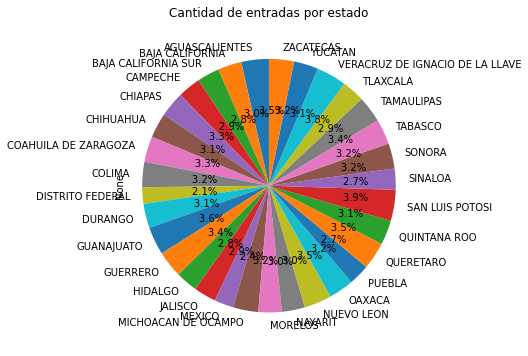

In [6]:
color_list =['gold','yellowgreen', 'ligghtcoral','lightskyblue','lightgreen',
            'pink']
explode_list = [0]

df2.plot(kind='pie', figsize=(5,6), autopct='%10.1f%%', startangle=90)
plt.title('Cantidad de entradas por estado')
plt.axis('Equal')

plt.show()

Se puede ver que se distribuyen los datos bastante uniformemente a lo largo del país. 

# Regresión y Análisis


In [7]:
vars=['peso','cintura','edad','diastol','sistol']
df[vars].corr()

,peso,cintura,edad,diastol,sistol
peso,1.000000,0.791677,0.317050,0.358054,0.353440
cintura,0.791677,1.000000,0.478879,0.362961,0.403265
edad,0.317050,0.478879,1.000000,0.345657,0.535218
diastol,0.358054,0.362961,0.345657,1.000000,0.663961
sistol,0.353440,0.403265,0.535218,0.663961,1.000000


Aquí podemos ver las correlaciones entre las variables críticas de la base de datos. Más cercano a 1 indica 

In [8]:
lm = linear_model.LinearRegression()
X= pd.DataFrame(df['edad'])
Y= pd.DataFrame(df['diastol'])

model=sm.OLS.from_formula('X~Y', data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      X   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     2529.
Date:                Fri, 10 Sep 2021   Prob (F-statistic):               0.00
Time:                        13:25:45   Log-Likelihood:                -81181.
No. Observations:               18640   AIC:                         1.624e+05
Df Residuals:                   18638   BIC:                         1.624e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.7110      0.927    -12.635      0.000     -13.528      -9.894
Y              0.6103      0.012     50.289      0.000       0.587       0.634
==============================================================================
Omnibus:                     1547.581   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1969.705
Skew:                           0.796   Prob(JB):                         0.00
Kurtosis:                       3.056   Cond. No.                         513.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

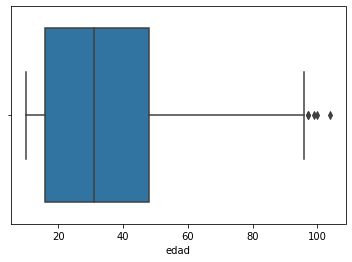

In [9]:
sns.boxplot( x='edad', data = df)

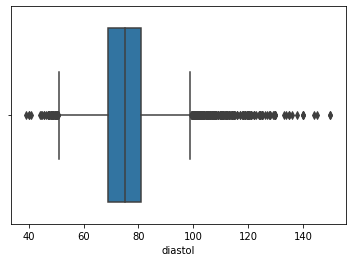

In [10]:
sns.boxplot( x='diastol', data = df)

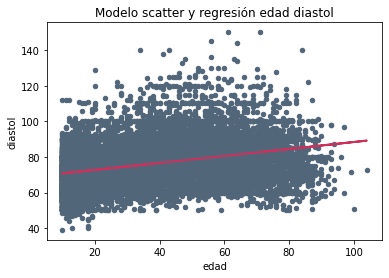

In [11]:
df.plot(kind='scatter', x='edad', 
        y='diastol', color ='#52667a')

df.fillna(0, inplace=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)

model_lm = lm.fit(X,Y)
plt.title('Modelo scatter y regresión edad diastol')

plt.plot(X,model_lm.predict(X),
        linewidth=2, color='#cc315c')

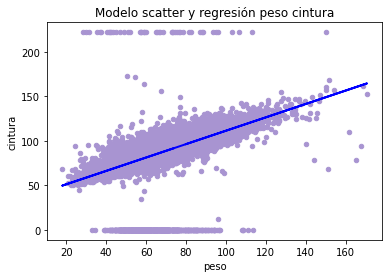

In [16]:
X= pd.DataFrame(df['peso'])
Y= pd.DataFrame(df['cintura'])
df.plot(kind='scatter', x='peso', 
        y='cintura', color ='#a894d1')

df.fillna(0, inplace=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)

model_lm = lm.fit(X,Y)
plt.title('Modelo scatter y regresión peso cintura')

plt.plot(X,model_lm.predict(X),
        linewidth=2, color='b')

In [13]:
df2=df[['edad','diastol']]
X= pd.DataFrame(df['edad'])
df2['reg'] = model_lm.predict(X)
df2

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,edad,diastol,reg
0,38,53.25,64.874676
1,11,50.00,44.562180
2,18,41.00,49.828383
3,10,64.00,43.809865
4,19,53.50,50.580697
...,...,...,...
18635,73,95.50,91.205690
18636,75,78.00,92.710320
18637,86,66.00,100.985781
18638,72,100.00,90.453375


In [14]:
df2['res'] = model_lm.predict(X) - df[['cintura']]
df2

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,edad,diastol,reg,res
0,38,53.25,64.874676,-33.825324
1,11,50.00,44.562180,-19.437820
2,18,41.00,49.828383,-17.771617
3,10,64.00,43.809865,-16.790135
4,19,53.50,50.580697,-62.419303
...,...,...,...,...
18635,73,95.50,91.205690,-1.794310
18636,75,78.00,92.710320,-10.339680
18637,86,66.00,100.985781,29.635781
18638,72,100.00,90.453375,-9.496625


In [15]:
df2['res'].mean()

-22.76432005133625